In [1]:
import numpy as np
import qutip as qutip
import time as time

from matplotlib import pyplot as plt

import sys
sys.path.append('../../utils')

from tomography import coherent_state_tomography as cst
from visualization import state_visualization as state_vis

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# An example of coherent state mle of the equal superposition 0-1 photon state afflicted by thermal noise of on average 1 photon

<IPython.core.display.Javascript object>


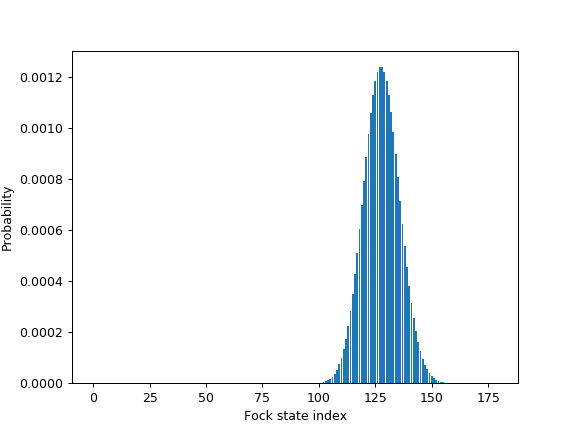

<IPython.core.display.Javascript object>


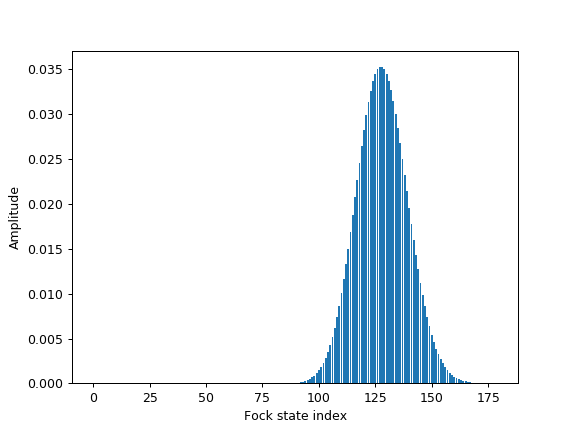

In [24]:
# Set the width of the square in phase space we are considering and the meshing.
#
# Additionally set the dimension of the Hilbert space (ie: the max photon number
# state after which we truncate Fock space). This number should be selected so
# that we have enough photon states to well-represent the coherent states in the 
# corners of our mesh, recalling that the coherent states at radius |alpha| in phase
# space are centered at photon number N0 = |alpha|^2 with spread from
# |alpha - alpha/sqrt(2)|^2 to |alpha + alpha/sqrt(2)|^2. If you're uncertain, just plot
# the Fock amplitudes of the coherent space and go out far enough to be well in the
# tail of the largest-radius coherent states of the mesh.
max_x = 8
mesh_size = 0.25
dim = 180

# Proof that this dimension is satisfactory for the square size
corner_alpha = max_x + 1j * max_x
corner_coherent_state = qutip.coherent_dm(dim, corner_alpha)
state_vis.plot_fock_basis_probabilities(corner_coherent_state)
state_vis.plot_fock_basis_amplitudes(corner_coherent_state)

<IPython.core.display.Javascript object>


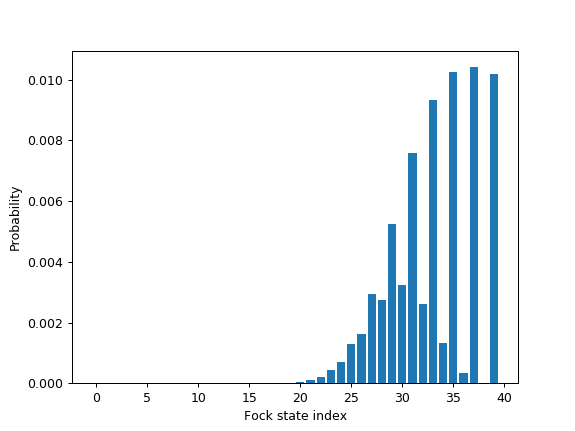

In [4]:
# An example of what happens when your dimension is unsatisfactory
bad_dim = 40
corner_coherent_state = qutip.coherent_dm(bad_dim, corner_alpha)
state_vis.plot_fock_basis_probabilities(corner_coherent_state)

In [9]:
# BACK TO MLE:
# Set the noise parameter of 1 noise photon and construct the noise state
number_of_noise_photons = 1
noise_state = qutip.thermal_dm(dim, number_of_noise_photons)

# Construct the noisy POVM that we'll use for tomography
noisy_povm, alphas, xs, ps = cst.generate_coherent_state_POVM(max_x, 
                                                              mesh_size, 
                                                              dim, 
                                                              noise_base=noise_state)

# Define the input state and use the noise state to generate its noisy Q function
#
# The Q function of a state is its ideal input for coherent state POVM as it is literally
# defined to be Q(alpha; rho) = 1/pi * (<alpha|rho|alpha>) = Tr(rho * POVM_alpha)
input_state = (qutip.basis(dim, 0) + qutip.basis(dim, 1)).unit()
noise_Q_function = qutip.qfunc(noise_state, xs, ps, g=2)
noisy_data_Q_function = \
    cst.evaluate_thermally_noisy_Q_function(input_state, 
                                            number_of_noise_photons, 
                                            xs, 
                                            ps)

In [6]:
# Perform MLE
number_of_mle_iterations = 100
s = time.time()
reconstructed_state, fidelities = cst.perform_coherent_state_MLE(
                                    noisy_povm,
                                    noise_Q_function, 
                                    number_of_mle_iterations,
                                    rho_ideal=input_state)
e = time.time()
print('Time for MLE reconstruction: ' + str(e - s) + ' s')

Final state fidelity: 0.9554904907846572


<IPython.core.display.Javascript object>


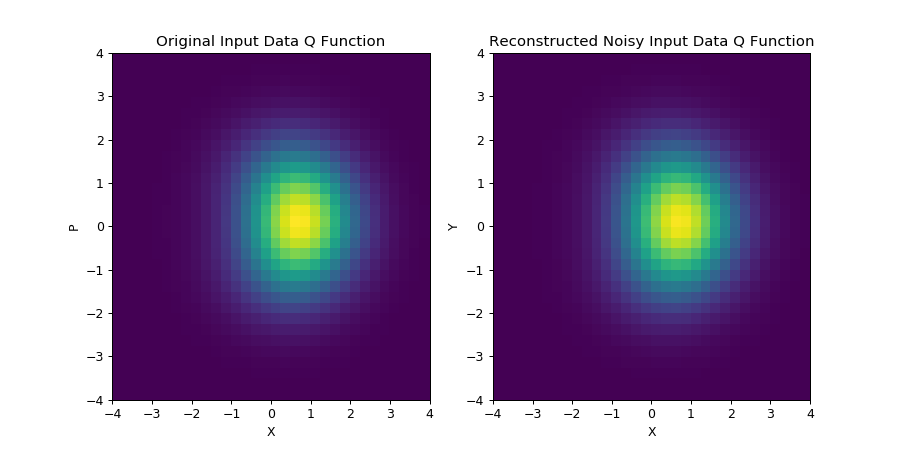

<IPython.core.display.Javascript object>


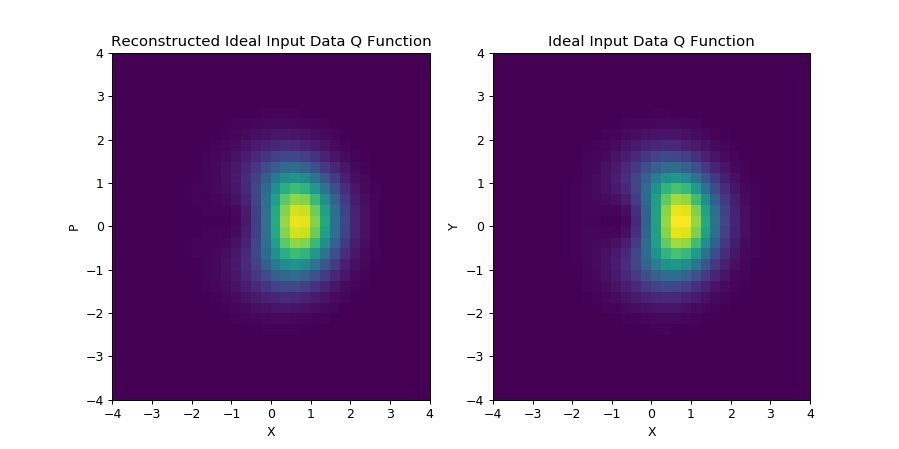

<IPython.core.display.Javascript object>


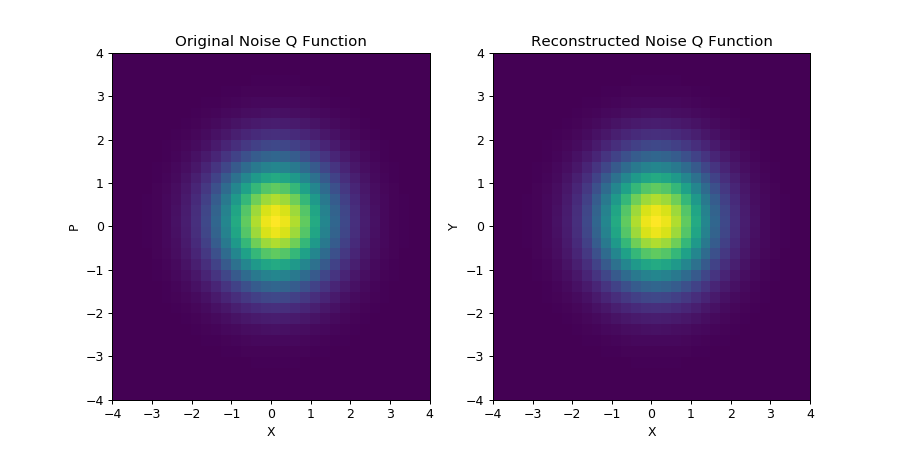

<IPython.core.display.Javascript object>


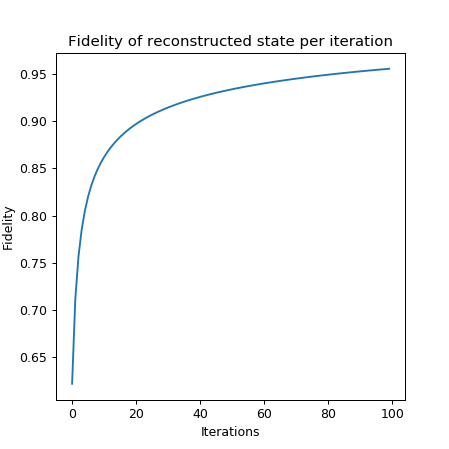

In [11]:
# Plot results
fidelity = qutip.fidelity(reconstructed_state, input_state)
print('Final state fidelity: ' + str(fidelity))
cst.plot_coherent_state_tomography_Q_functions(noisy_data_Q_function,
                                               reconstructed_state,
                                               xs,
                                               ps,
                                               noise_data=noise_Q_function,
                                               noise_photon_number=number_of_noise_photons,
                                               ideal_state=input_state,
                                               fidelities=fidelities)

# Using a more realistic thermal noise of 4.4 photons

<IPython.core.display.Javascript object>


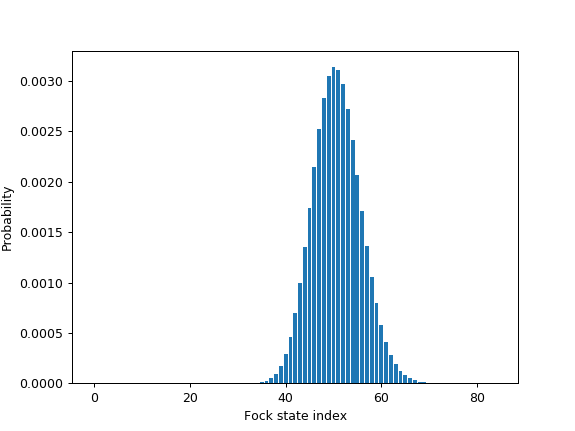

In [3]:
# We need a larger mesh and state space for all these photons
max_x = 8
mesh_size = 0.25
dim = 85

# Proof that this dimension is satisfactory for the square size
corner_alpha = max_x + 1j * max_x
corner_coherent_state = qutip.coherent_dm(dim, corner_alpha)
state_vis.plot_fock_basis_probabilities(corner_coherent_state)

In [4]:
# Set the noise parameter of 4.4 noise photons and construct the noise state
number_of_noise_photons = 4.4
noise_state = qutip.thermal_dm(dim, number_of_noise_photons)

# Construct the noisy POVM that we'll use for tomography
noisy_povm, alphas, xs, ps = cst.generate_coherent_state_POVM(max_x, 
                                                              mesh_size, 
                                                              dim, 
                                                              noise_base=noise_state)

# Define the input state and use the noise state to generate its noisy Q function.
#
# Also calculate the Q function of the noise for plotting purposes
#
# The Q function of a state is its ideal input for coherent state POVM as it is literally
# defined to be Q(alpha; rho) = 1/pi * (<alpha|rho|alpha>) = Tr(rho * POVM_alpha)
input_state = (qutip.basis(dim, 0) + qutip.basis(dim, 1)).unit()
noise_Q_function = qutip.qfunc(noise_state, xs, ps, g=2)
noisy_data_Q_function = \
    cst.evaluate_thermally_noisy_Q_function(input_state, 
                                            number_of_noise_photons, 
                                            xs, 
                                            ps)

In [9]:
# Perform MLE
number_of_mle_iterations = 1000
s = time.time()
reconstructed_state, fidelities = cst.perform_coherent_state_MLE(
                                    noisy_povm,
                                    noisy_data_Q_function, 
                                    number_of_mle_iterations,
                                    rho_ideal=input_state)
e = time.time()
print('Time for MLE reconstruction: ' + str(e - s) + ' s')

Time for MLE reconstruction: 1931.7072808742523 s


Final state fidelity: 0.9340650865345654


<IPython.core.display.Javascript object>


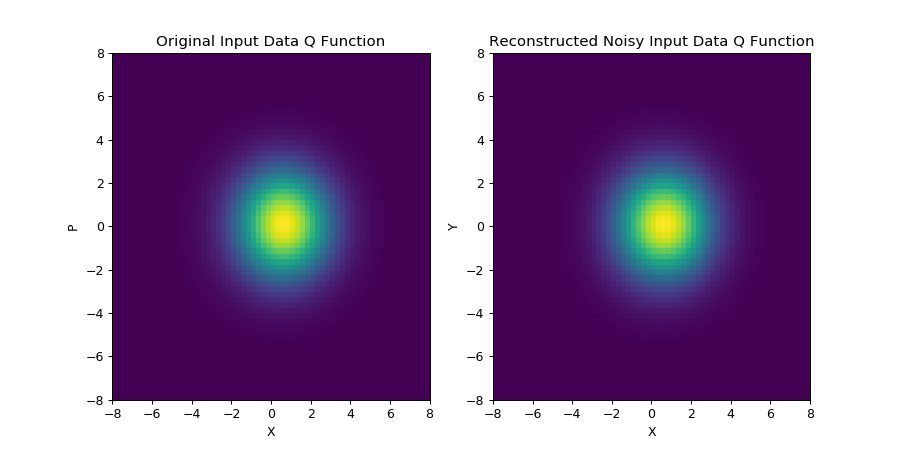

<IPython.core.display.Javascript object>


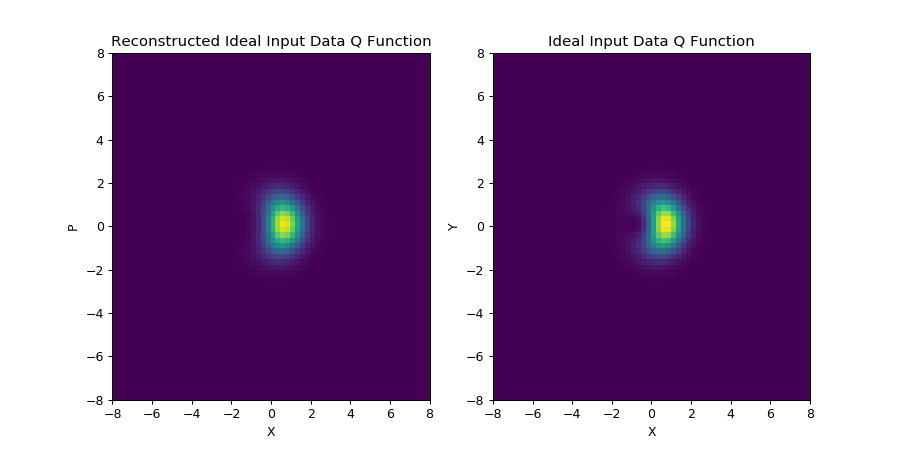

<IPython.core.display.Javascript object>


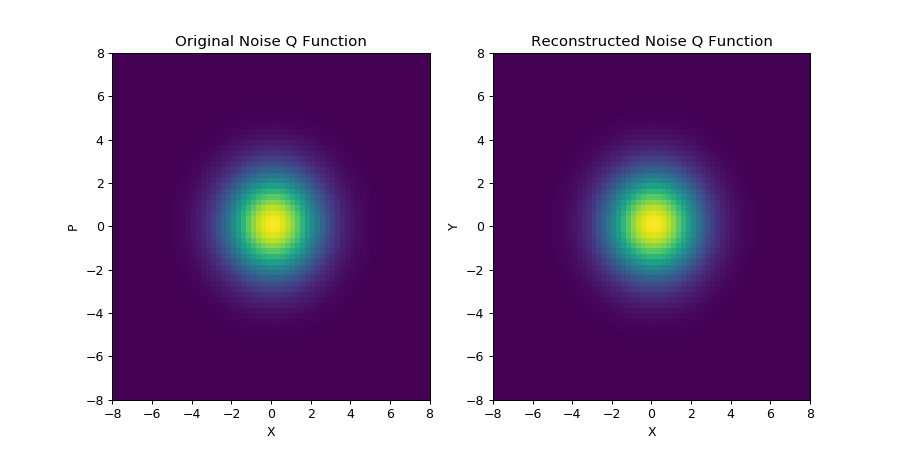

<IPython.core.display.Javascript object>


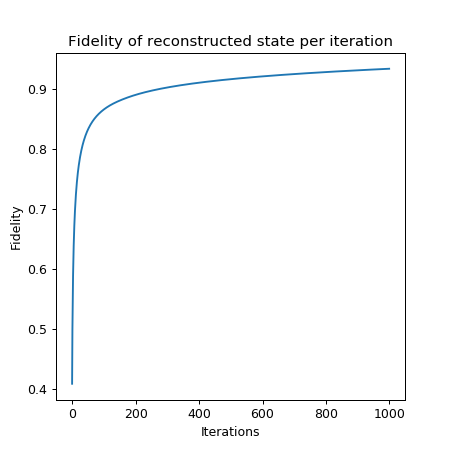

In [10]:
# Plot results
fidelity = qutip.fidelity(reconstructed_state, input_state)
print('Final state fidelity: ' + str(fidelity))
cst.plot_coherent_state_tomography_Q_functions(noisy_data_Q_function,
                                               reconstructed_state,
                                               xs,
                                               ps,
                                               noise_data=noise_Q_function,
                                               noise_photon_number=number_of_noise_photons,
                                               ideal_state=input_state,
                                               fidelities=fidelities)

# Increasing the mesh size to see if it results in faster or slower convergence

<IPython.core.display.Javascript object>


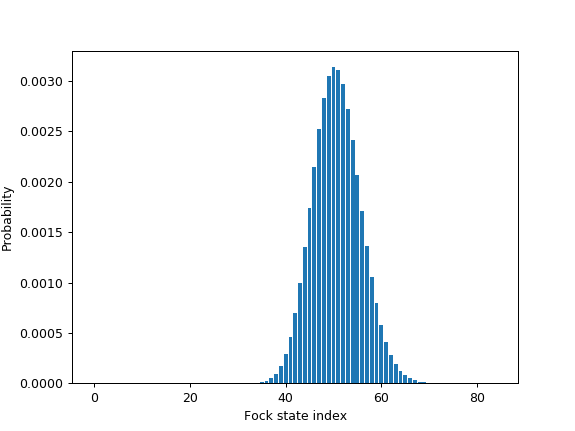

In [11]:
# We need a larger mesh and state space for all these photons
max_x = 8
mesh_size = 1
dim = 85

# Proof that this dimension is satisfactory for the square size
corner_alpha = max_x + 1j * max_x
corner_coherent_state = qutip.coherent_dm(dim, corner_alpha)
state_vis.plot_fock_basis_probabilities(corner_coherent_state)

In [12]:
# Set the noise parameter of 4.4 noise photons and construct the noise state
number_of_noise_photons = 4.4
noise_state = qutip.thermal_dm(dim, number_of_noise_photons)

# Construct the noisy POVM that we'll use for tomography
noisy_povm, alphas, xs, ps = cst.generate_coherent_state_POVM(max_x, 
                                                              mesh_size, 
                                                              dim, 
                                                              noise_base=noise_state)

# Define the input state and use the noise state to generate its noisy Q function.
#
# Also calculate the Q function of the noise for plotting purposes
#
# The Q function of a state is its ideal input for coherent state POVM as it is literally
# defined to be Q(alpha; rho) = 1/pi * (<alpha|rho|alpha>) = Tr(rho * POVM_alpha)
input_state = (qutip.basis(dim, 0) + qutip.basis(dim, 1)).unit()
noise_Q_function = qutip.qfunc(noise_state, xs, ps, g=2)
noisy_data_Q_function = \
    cst.evaluate_thermally_noisy_Q_function(input_state, 
                                            number_of_noise_photons, 
                                            xs, 
                                            ps)

In [13]:
# Perform MLE
number_of_mle_iterations = 1000
s = time.time()
reconstructed_state, fidelities = cst.perform_coherent_state_MLE(
                                    noisy_povm,
                                    noisy_data_Q_function, 
                                    number_of_mle_iterations,
                                    rho_ideal=input_state)
e = time.time()
print('Time for MLE reconstruction: ' + str(e - s) + ' s')

Time for MLE reconstruction: 177.2830832004547 s


Final state fidelity: 0.9323356179394429


<IPython.core.display.Javascript object>


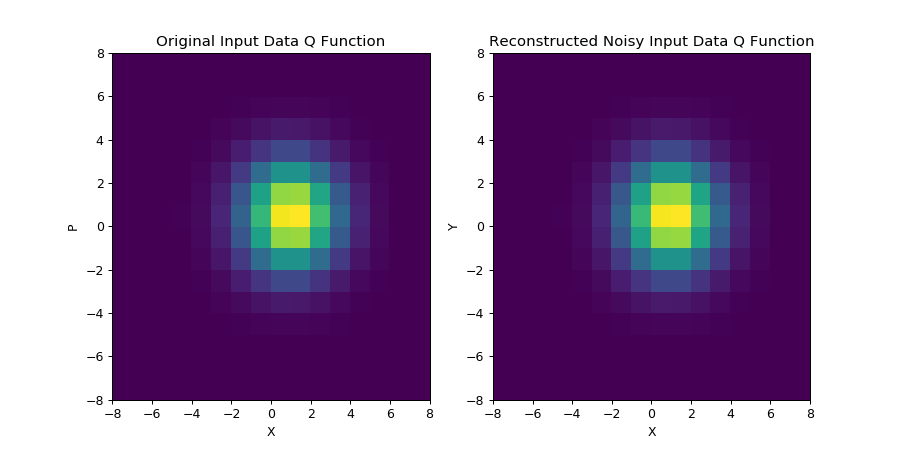

<IPython.core.display.Javascript object>


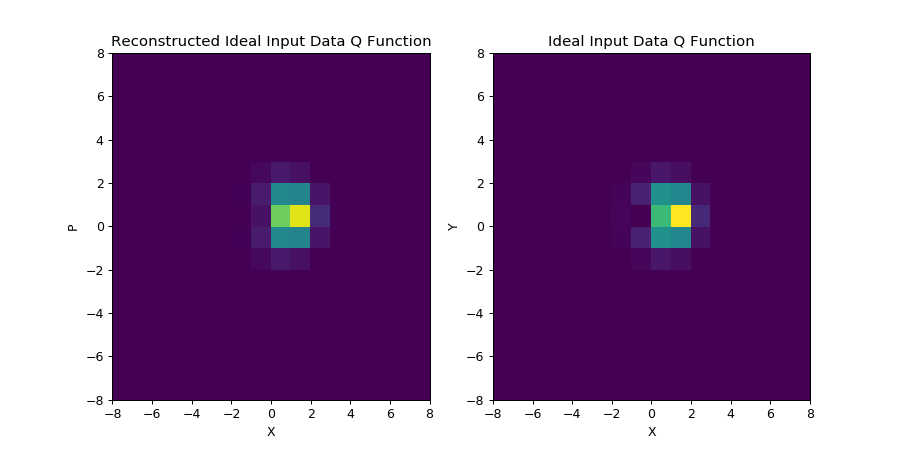

<IPython.core.display.Javascript object>


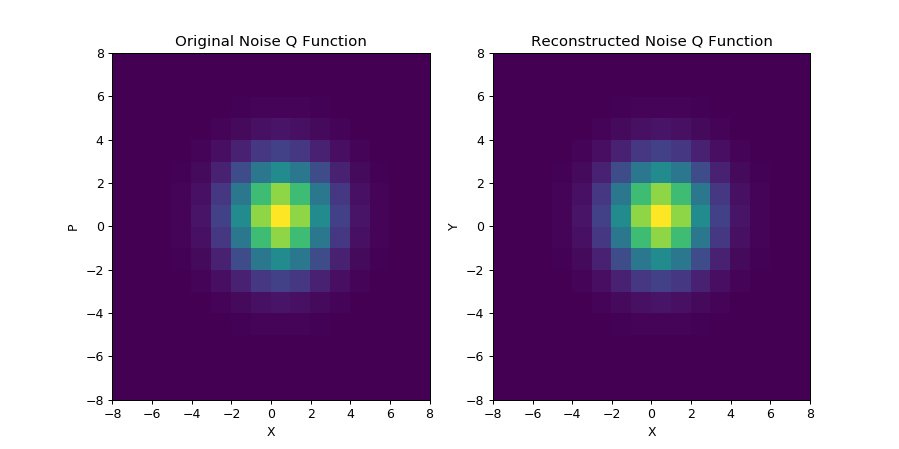

<IPython.core.display.Javascript object>


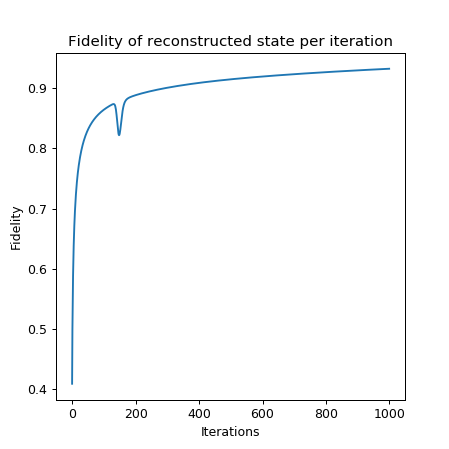

In [14]:
# Plot results
fidelity = qutip.fidelity(reconstructed_state, input_state)
print('Final state fidelity: ' + str(fidelity))
cst.plot_coherent_state_tomography_Q_functions(noisy_data_Q_function,
                                               reconstructed_state,
                                               xs,
                                               ps,
                                               noise_data=noise_Q_function,
                                               noise_photon_number=number_of_noise_photons,
                                               ideal_state=input_state,
                                               fidelities=fidelities)

# Mesh size of 0.5

<IPython.core.display.Javascript object>


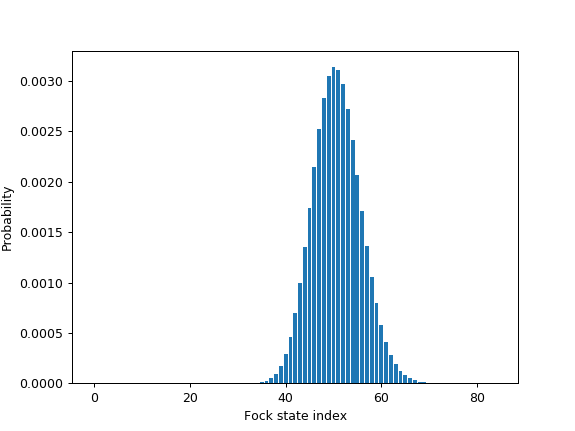

In [15]:
# We need a larger mesh and state space for all these photons
max_x = 8
mesh_size = 0.5
dim = 85

# Proof that this dimension is satisfactory for the square size
corner_alpha = max_x + 1j * max_x
corner_coherent_state = qutip.coherent_dm(dim, corner_alpha)
state_vis.plot_fock_basis_probabilities(corner_coherent_state)

In [16]:
# Set the noise parameter of 4.4 noise photons and construct the noise state
number_of_noise_photons = 4.4
noise_state = qutip.thermal_dm(dim, number_of_noise_photons)

# Construct the noisy POVM that we'll use for tomography
noisy_povm, alphas, xs, ps = cst.generate_coherent_state_POVM(max_x, 
                                                              mesh_size, 
                                                              dim, 
                                                              noise_base=noise_state)

# Define the input state and use the noise state to generate its noisy Q function.
#
# Also calculate the Q function of the noise for plotting purposes
#
# The Q function of a state is its ideal input for coherent state POVM as it is literally
# defined to be Q(alpha; rho) = 1/pi * (<alpha|rho|alpha>) = Tr(rho * POVM_alpha)
input_state = (qutip.basis(dim, 0) + qutip.basis(dim, 1)).unit()
noise_Q_function = qutip.qfunc(noise_state, xs, ps, g=2)
noisy_data_Q_function = \
    cst.evaluate_thermally_noisy_Q_function(input_state, 
                                            number_of_noise_photons, 
                                            xs, 
                                            ps)

In [17]:
# Perform MLE
number_of_mle_iterations = 1000
s = time.time()
reconstructed_state, fidelities = cst.perform_coherent_state_MLE(
                                    noisy_povm,
                                    noisy_data_Q_function, 
                                    number_of_mle_iterations,
                                    rho_ideal=input_state)
e = time.time()
print('Time for MLE reconstruction: ' + str(e - s) + ' s')

Time for MLE reconstruction: 544.3180229663849 s


Final state fidelity: 0.9342010840754876


<IPython.core.display.Javascript object>


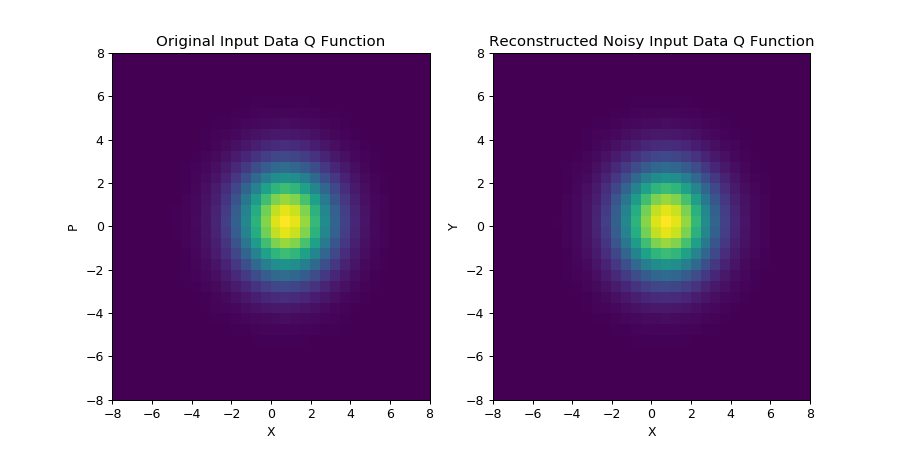

<IPython.core.display.Javascript object>


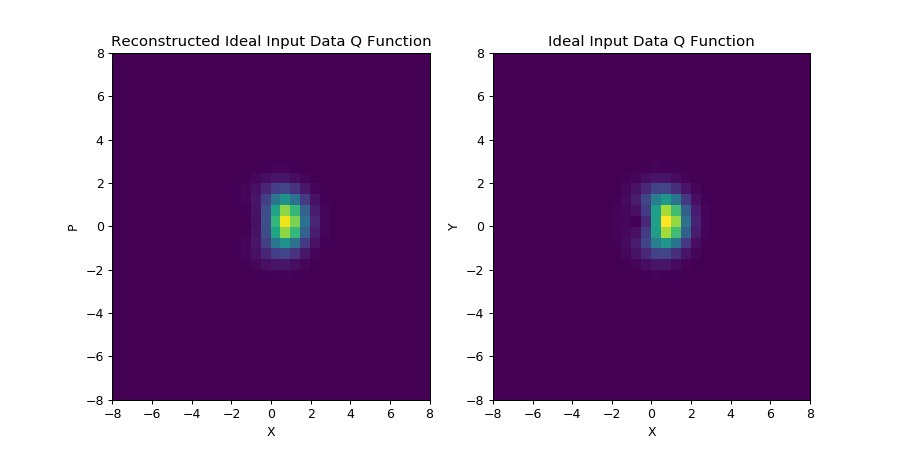

<IPython.core.display.Javascript object>


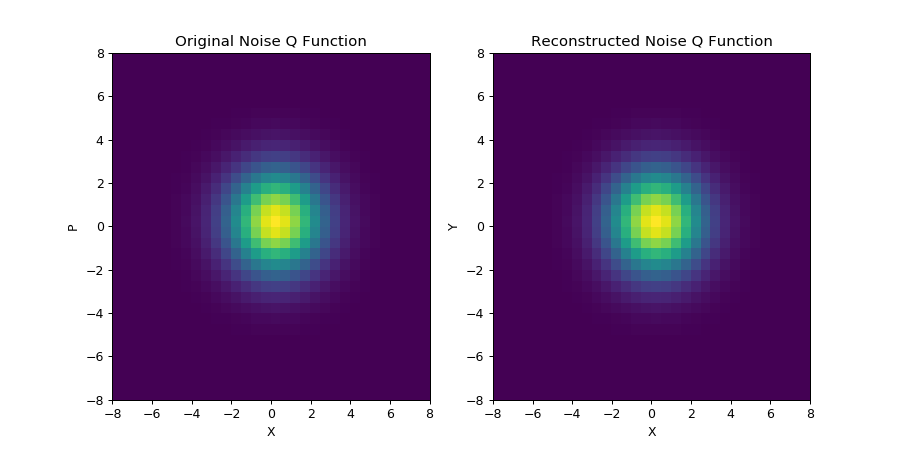

<IPython.core.display.Javascript object>


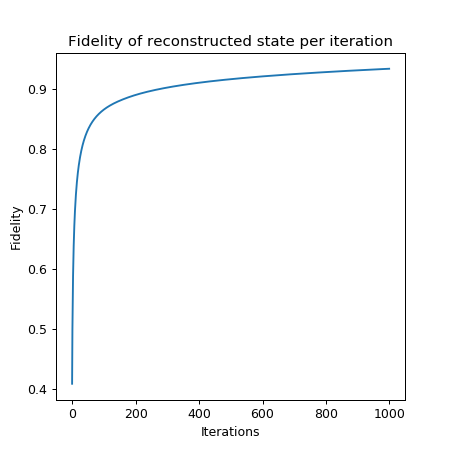

In [18]:
# Plot results
fidelity = qutip.fidelity(reconstructed_state, input_state)
print('Final state fidelity: ' + str(fidelity))
cst.plot_coherent_state_tomography_Q_functions(noisy_data_Q_function,
                                               reconstructed_state,
                                               xs,
                                               ps,
                                               noise_data=noise_Q_function,
                                               noise_photon_number=number_of_noise_photons,
                                               ideal_state=input_state,
                                               fidelities=fidelities)